<a href="https://colab.research.google.com/github/mmilannaik/bostonhousepricing/blob/main/W43S5_XGboost%20Missing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Generating a toy dataset
np.random.seed(0)
X = np.random.rand(100, 2)
y = X @ np.array([1.5, -2]) + np.random.normal(0, 0.1, 100)

# Introducing missing values in the first feature
X[20:40, 0] = np.nan

X

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152],
       [0.79172504, 0.52889492],
       [0.56804456, 0.92559664],
       [0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985],
       [0.77815675, 0.87001215],
       [0.97861834, 0.79915856],
       [0.46147936, 0.78052918],
       [0.11827443, 0.63992102],
       [0.14335329, 0.94466892],
       [0.52184832, 0.41466194],
       [0.26455561, 0.77423369],
       [0.45615033, 0.56843395],
       [0.0187898 , 0.6176355 ],
       [0.61209572, 0.616934  ],
       [0.94374808, 0.6818203 ],
       [       nan, 0.43703195],
       [       nan, 0.06022547],
       [       nan, 0.67063787],
       [       nan, 0.1289263 ],
       [       nan, 0.36371077],
       [       nan, 0.43860151],
       [       nan, 0.10204481],
       [       nan, 0.16130952],
       [       nan, 0.2532916 ],
       [       nan, 0.24442559],
       [  

In [2]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Trying Linear Regression (this should fail due to missing values)
lr = LinearRegression()
try:
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred)}")
except ValueError as e:
    print(f"Linear Regression Error: {e}")

Linear Regression Error: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [4]:
# Now, using XGBoost which can handle missing values
xgb = XGBRegressor(max_depth=3)
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
y_pred_xgb = xgb.predict(X_test)
print(f"XGBoost MSE: {mean_squared_error(y_test, y_pred_xgb)}")

XGBoost MSE: 0.23530803495794123


<Figure size 1500x1100 with 0 Axes>

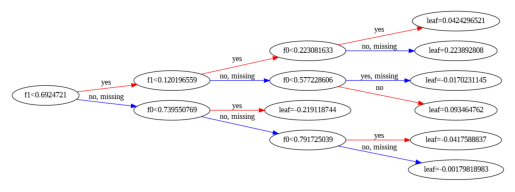

In [5]:
from xgboost import XGBRegressor, plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree
plt.figure(figsize=(15, 11))
plot_tree(xgb, num_trees=1, rankdir='LR')  # 'LR' is for left-to-right tree orientation
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generating a synthetic dataset
X, y = make_classification(n_samples=1000000, n_features=50, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
import xgboost as xgb
import time

# Configure parameters for CPU
params_cpu = {
    'objective': 'binary:logistic',
    'tree_method': 'hist',  # Using histogram-based method on CPU
    'eval_metric': 'logloss'
}

# Train on CPU
cpu_start = time.time()
model_cpu = xgb.XGBClassifier(**params_cpu)
model_cpu.fit(X_train, y_train)
cpu_end = time.time()

print(f"Training time with CPU: {cpu_end - cpu_start} seconds")


Training time with CPU: 35.57196402549744 seconds


In [8]:
# Specify the parameters for XGBClassifier, setting device to 'cuda' for GPU usage
params_gpu = {
    'objective': 'binary:logistic',
    'tree_method': 'hist',  # Use histogram-based method
    'eval_metric': 'logloss',
    'device': 'cuda'  # Use CUDA for GPU computation
}

# Train on GPU
gpu_start = time.time()
model_gpu = xgb.XGBClassifier(**params_gpu)
model_gpu.fit(X_train, y_train)
gpu_end = time.time()

print(f"Training time with GPU: {gpu_end - gpu_start} seconds")

Training time with GPU: 7.022187232971191 seconds


In [9]:
import time
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generating a synthetic dataset
X, y = make_classification(n_samples=100000, n_features=20, n_informative=2, n_redundant=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and time XGBoost with a specified number of threads
def train_xgboost(nthread):
    model = XGBClassifier(nthread=nthread)
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    return end_time - start_time

# Training using all available cores
multi_core_duration = train_xgboost(nthread=-1)
print(f"Training time with all available cores: {multi_core_duration} seconds")

# Training using a single core
single_core_duration = train_xgboost(nthread=1)
print(f"Training time with a single core: {single_core_duration} seconds")


Training time with all available cores: 1.6387333869934082 seconds
Training time with a single core: 1.9233384132385254 seconds
